# MAJOR PROJECT - TWITTER DATASET

In [1]:
import pandas as pd, re
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('punkt')
nltk.download()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maqbool\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [15]:
info_df=pd.read_csv('Information.csv',encoding='latin-1')

# EXPLORATORY DATA ANALYSIS

In [16]:
info_df.columns

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [17]:
info_df=info_df[[ 'gender', 'gender:confidence', 'description',
        'link_color', 'name', 'sidebar_color', 'text', 'tweet_count']]

In [18]:
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,ABB8C2,lwtprettylaugh,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
5,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
6,brand,1.0000,"A global marketplace for images, videos and mu...",298AAE,Shutterstock,0,@BpackEngineer Thank you for your patience whi...,13354
7,male,1.0000,The secret of getting ahead is getting started.,0000FF,RobinMeske,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117
8,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,9266CC,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482
9,female,1.0000,"Renaissance art historian, University of Notti...",9266CC,GabrieleNeher,FFFFFF,@Evielady just how lovely is the tree this yea...,26085


In [19]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 8 columns):
gender               19953 non-null object
gender:confidence    20024 non-null float64
description          16306 non-null object
link_color           20050 non-null object
name                 20050 non-null object
sidebar_color        20050 non-null object
text                 20050 non-null object
tweet_count          20050 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [20]:
info_df = info_df[info_df['gender'].notna()]

In [21]:
info_df.reset_index(drop=True,inplace=True)
info_df


,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,0.6625,louis whining and squealing and all,ABB8C2,lwtprettylaugh,C0DEED,i absolutely adore when louis starts the songs...,5617
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
5,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
6,brand,1.0000,"A global marketplace for images, videos and mu...",298AAE,Shutterstock,0,@BpackEngineer Thank you for your patience whi...,13354
7,male,1.0000,The secret of getting ahead is getting started.,0000FF,RobinMeske,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117
8,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,9266CC,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482
9,female,1.0000,"Renaissance art historian, University of Notti...",9266CC,GabrieleNeher,FFFFFF,@Evielady just how lovely is the tree this yea...,26085


In [22]:
#Number of males and females
import matplotlib.pyplot as plt
info = info_df.groupby('gender').size()
print(type(info))
brand = info[0]
females = info[1]
males = info[2]
unknowns = info[3]

print(brand,females,males,unknowns)

genderData = {'brand':brand,
             'females':females,
             'males':males,
             'unknowns':unknowns}

types = list(genderData.keys())
count = list(genderData.values())

plt.bar(types,count,color='blue',width=0.4)
plt.xlabel("TYPES OF GENDERS") 
plt.ylabel("FREQUENCY") 
plt.title("GENDERS IN THE GIVEN DATASET") 
plt.show()

<class 'pandas.core.series.Series'>
5942 6700 6194 1117


<Figure size 640x480 with 1 Axes>

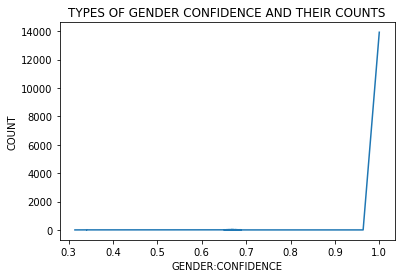

In [23]:
genderConfidenceCount = info_df.groupby('gender:confidence').size()
gcData = genderConfidenceCount.to_dict()
gcData
x = list(gcData.keys())
y = list(gcData.values())
plt.plot(x, y)
plt.xlabel('GENDER:CONFIDENCE') 
plt.ylabel('COUNT')
plt.title('TYPES OF GENDER CONFIDENCE AND THEIR COUNTS') 
plt.show() 

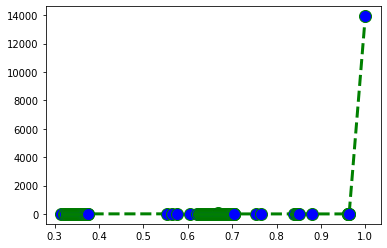

In [24]:
plt.plot(x, y, color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=12)

In [26]:
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953 entries, 0 to 19952
Data columns (total 8 columns):
gender               19953 non-null object
gender:confidence    19953 non-null float64
description          16224 non-null object
link_color           19953 non-null object
name                 19953 non-null object
sidebar_color        19953 non-null object
text                 19953 non-null object
tweet_count          19953 non-null int64
dtypes: float64(1), int64(1), object(6)
memory usage: 1.2+ MB


In [27]:
info_df=info_df[info_df['gender:confidence']>0.8]
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
3,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
4,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
5,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
6,brand,1.0000,"A global marketplace for images, videos and mu...",298AAE,Shutterstock,0,@BpackEngineer Thank you for your patience whi...,13354
7,male,1.0000,The secret of getting ahead is getting started.,0000FF,RobinMeske,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117
8,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,9266CC,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482
9,female,1.0000,"Renaissance art historian, University of Notti...",9266CC,GabrieleNeher,FFFFFF,@Evielady just how lovely is the tree this yea...,26085
11,brand,1.0000,highly extraordinary auctions,0084B4,eliseotecleo,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...,66684


In [28]:
info_df.reset_index(drop=True,inplace=True)
info_df


,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471
2,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693
3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462
4,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036
5,brand,1.0000,"A global marketplace for images, videos and mu...",298AAE,Shutterstock,0,@BpackEngineer Thank you for your patience whi...,13354
6,male,1.0000,The secret of getting ahead is getting started.,0000FF,RobinMeske,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117
7,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,9266CC,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482
8,female,1.0000,"Renaissance art historian, University of Notti...",9266CC,GabrieleNeher,FFFFFF,@Evielady just how lovely is the tree this yea...,26085
9,brand,1.0000,highly extraordinary auctions,0084B4,eliseotecleo,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...,66684


In [29]:
info_df=info_df[info_df['gender']!='unknown']

In [30]:
info_df.reset_index(drop=True, inplace=True)

In [31]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('English')

In [32]:
clean_texts = []
for i in range(info_df.shape[0]):
    current_message = info_df['text'].values[i]
    tokenized_words = word_tokenize(current_message)
    clean_message = ''
    for word in tokenized_words:
        if word not in stop_words and not word.startswith('@'):
            try:
                word = int(word)
            except:
                clean_message += word + ' '
                
    clean_texts.append(clean_message)        
    
len(clean_texts)

13817

In [33]:
info_df['clean_texts']=clean_texts
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count,clean_texts
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,Robbie E Responds To Critics After Win Against...
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,ÛÏIt felt like friends I living story themÛ...
2,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,Hi JordanSpieth - Looking url - use IFTTT ? ! ...
3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462,Watching Neighbours Sky+ catching Neighbs ! ! ...
4,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036,"Ive seen people train lamps , chairs , tvs etc..."
5,brand,1.0000,"A global marketplace for images, videos and mu...",298AAE,Shutterstock,0,@BpackEngineer Thank you for your patience whi...,13354,BpackEngineer Thank patience take care issue !
6,male,1.0000,The secret of getting ahead is getting started.,0000FF,RobinMeske,C0DEED,Gala Bingo clubs bought for å£241m: The UK's l...,112117,Gala Bingo clubs bought å£241m : The UK 's lar...
7,female,1.0000,Pll Fan // Crazy about MCD // Ramen is bae,9266CC,pigzilla_,0,@_Aphmau_ the pic defines all mcd fangirls/fan...,482,_Aphmau_ pic defines mcd fangirls/fanboys mcd ...
8,female,1.0000,"Renaissance art historian, University of Notti...",9266CC,GabrieleNeher,FFFFFF,@Evielady just how lovely is the tree this yea...,26085,Evielady lovely tree year ! Never seen gorgeou...
9,brand,1.0000,highly extraordinary auctions,0084B4,eliseotecleo,C0DEED,MTG Deals 1x Rank-Up-Magic - The Seventh One -...,66684,MTG Deals 1x Rank-Up-Magic - The Seventh One -...


Question 1:
----------------------
Male and Female top used words.
-------

In [34]:
female_tweets = info_df[info_df['gender'] == 'female']
print('Female Tweets:')
print(female_tweets['text'].head())

print('\nMale Tweets:')
male_tweets = info_df[info_df['gender'] == 'male']
print(male_tweets['text'].head())


def get_clean_tweet(text):
    url_regex = r'(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}\.[a-zA-Z0-9()]{1,6}\b([-a-zA-Z0-9()@:%_\+.~#?&//=]*))'
    twitter_handle_regex = r'(@[a-zA-Z_]+){1,15}'
    hashtag_regex = r'#[a-z-A-Z_\']+'
    clean_text = re.sub(url_regex, '', text)
    clean_text = re.sub(twitter_handle_regex, '', clean_text)
    clean_text = re.sub(hashtag_regex, '', clean_text)
    word_list = re.findall(r"[A-Za-z']+", clean_text)
    return ' '.join(word_list)

def get_word_count(tweets):
    words = dict()
    stop_words = stopwords.words("english")
    for tweet in enumerate(tweets):
        word_list = re.findall(r"[A-Za-z']+", tweet[1])
        for word in word_list:
            word = word.lower()
            if word in stop_words:
                continue
            words[word] = words.get(word, 0) + 1
    return words

female_tweets['clean_text'] = female_tweets['text'].apply(lambda tweet: get_clean_tweet(tweet))
male_tweets['clean_text'] = male_tweets['text'].apply(lambda tweet: get_clean_tweet(tweet))

female_words = get_word_count(female_tweets['clean_text'])
male_words = get_word_count(male_tweets['clean_text'])


sorted_female = {k: v for k, v in sorted(female_words.items(), key=lambda item: item[1], reverse=True)}
sorted_male = {k: v for k, v in sorted(male_words.items(), key=lambda item: item[1], reverse=True)}
print('Female top used words:')
for i in list(sorted_female.items())[:5]:
    print('{}: {}'.format(i[0], i[1]))
print('\nMale top used words:')
for i in list(sorted_male.items())[:5]:
    print('{}: {}'.format(i[0], i[1]))

Female Tweets:
3     Watching Neighbours on Sky+ catching up with t...
4     Ive seen people on the train with lamps, chair...
7     @_Aphmau_ the pic defines all mcd fangirls/fan...
8     @Evielady just how lovely is the tree this yea...
11    https://t.co/EROGWTFTYo It's a glow of satisfa...
Name: text, dtype: object

Male Tweets:
0     Robbie E Responds To Critics After Win Against...
1     ÛÏIt felt like they were my friends and I was...
2     Hi @JordanSpieth - Looking at the url - do you...
6     Gala Bingo clubs bought for å£241m: The UK's l...
13    @coolyazzy94 Ditto - I'm still learning the fa...
Name: text, dtype: object
Female top used words:
i'm: 438
like: 358
get: 303
one: 262
day: 253

Male top used words:
like: 271
get: 258
i'm: 236
one: 193
time: 181


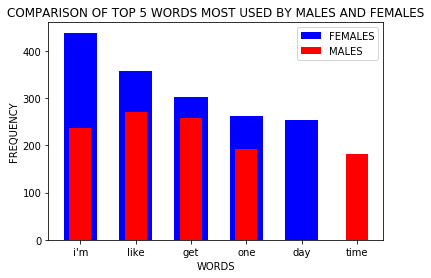

In [35]:
#TOP 5 WORDS MOST USED BY MALES AND FEMALES
#BY FEMALES
xF = list(sorted_female.keys())[:5]
yF = list(sorted_female.values())[:5]
xM = list(sorted_male.keys())[:5]
yM = list(sorted_male.values())[:5]
p1 = plt.bar(xF,yF,color='blue',width=0.6)
p2 = plt.bar(xM,yM,color='red',width=0.4)
plt.xlabel("WORDS") 
plt.ylabel("FREQUENCY") 
plt.title("COMPARISON OF TOP 5 WORDS MOST USED BY MALES AND FEMALES") 
plt.legend((p1[0], p2[0]), ('FEMALES', 'MALES'))
plt.show()

Question 2:
------
Is the gender male or female?
-------------


Method 1: USING RANDOM FOREST CLASSIFICATION
-----------

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
X = info_df['clean_texts']
Y = info_df['gender']
X = cv.fit_transform(X)
X_train,X_test, y_train, y_test = train_test_split(X,info_df['gender'])

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rfClassifier = RandomForestClassifier(n_estimators=100)

In [74]:
rfClassifier.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
y_pred=rfClassifier.predict(X_test)

In [76]:
from sklearn import metrics

In [77]:
accuracy = metrics.accuracy_score(y_test, y_pred)

In [78]:
accuracy

0.5696092619392186

Accuracy of RFC: 56.9%                                                                                                  


Method 2: Using Naive Bayes
----------

Is the gender male or female?

# NAIVE BAYES

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
cv = CountVectorizer()
sparse_data = cv.fit_transform(info_df['clean_texts'])

In [60]:
X= sparse_data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(sparse_data, info_df['gender'])

In [22]:
from sklearn.naive_bayes import MultinomialNB

Attempt-1:

In [23]:
clf = MultinomialNB()

In [24]:
clf.fit(X_train, y_train)

MultinomialNB()

In [25]:
predicted = clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, predicted)

0.5826338639652677

Accuracy of Naive Bayes: 58.2%

In [28]:
## Concatenating description to clean_texts

In [29]:
info_df['text+description']=info_df['clean_texts'].astype(str)+' '+ info_df['description'].astype(str)

In [30]:
info_df

,gender,gender:confidence,description,link_color,name,sidebar_color,text,tweet_count,clean_texts,text+description
0,male,1.0000,i sing my own rhythm.,08C2C2,sheezy0,FFFFFF,Robbie E Responds To Critics After Win Against...,110964,Robbie E Responds To Critics After Win Against...,Robbie E Responds To Critics After Win Against...
1,male,1.0000,I'm the author of novels filled with family dr...,0084B4,DavdBurnett,C0DEED,ÛÏIt felt like they were my friends and I was...,7471,ÛÏIt felt like friends I living story themÛ...,ÛÏIt felt like friends I living story themÛ...
2,male,1.0000,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",0084B4,douggarland,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,1693,Hi JordanSpieth - Looking url - use IFTTT ? ! ...,Hi JordanSpieth - Looking url - use IFTTT ? ! ...
3,female,1.0000,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,3B94D9,WilfordGemma,0,Watching Neighbours on Sky+ catching up with t...,31462,Watching Neighbours Sky+ catching Neighbs ! ! ...,Watching Neighbours Sky+ catching Neighbs ! ! ...
4,female,1.0000,you don't know me.,F5ABB5,monroevicious,0,"Ive seen people on the train with lamps, chair...",20036,"Ive seen people train lamps , chairs , tvs etc...","Ive seen people train lamps , chairs , tvs etc..."
...,...,...,...,...,...,...,...,...,...,...
13812,female,1.0000,(rp),0084B4,capuletrosa,C0DEED,"@lookupondeath ...Fine, and I'll drink tea too...",783,"lookupondeath ... Fine , I 'll drink tea . I l...","lookupondeath ... Fine , I 'll drink tea . I l..."
13813,male,1.0000,"Whatever you like, it's not a problem at all. ...",CFB929,BenNight41,0,Greg Hardy you a good player and all but don't...,13523,Greg Hardy good player n't get face Dez Bryant...,Greg Hardy good player n't get face Dez Bryant...
13814,male,1.0000,#TeamBarcelona ..You look lost so you should f...,0084B4,realuzzyfluxz,C0DEED,You can miss people and still never want to se...,26419,You miss people still never want see,You miss people still never want see #TeamBar...
13815,female,0.8489,Anti-statist; I homeschool my kids. Aspiring t...,9266CC,argumatronic,0,@bitemyapp i had noticed your tendency to pee ...,56073,"bitemyapp noticed tendency pee carpet , n't wa...","bitemyapp noticed tendency pee carpet , n't wa..."


Attempt-2:

In [31]:
sparse_data2 = cv.fit_transform(info_df['text+description'])

In [32]:
X_train,X_test, y_train, y_test = train_test_split(sparse_data2, info_df['gender'])

In [33]:
clf.fit(X_train, y_train)

MultinomialNB()

In [34]:
y_predicted = clf.predict(X_test)

In [35]:
accuracy_score(y_test, y_predicted)

0.6836468885672938

Accuracy of Naive Bayes: 68.3% 

In [36]:
## Concatenate name to text+ description

Attempt-3:

In [37]:
info_df['text+description+name']=info_df['clean_texts'].astype(str)+' '+ info_df['description'].astype(str)+' '+info_df['name'].astype(str)

In [38]:
sparse_data3 = cv.fit_transform(info_df['text+description+name'])

In [39]:
X_train,X_test, y_train, y_test = train_test_split(sparse_data3, info_df['gender'])

In [40]:
clf.fit(X_train, y_train)

MultinomialNB()

In [41]:
y_predicted = clf.predict(X_test)

In [42]:
accuracy_score(y_test, y_predicted)

0.6960926193921853

Accuracy for Naive Bayes: 69.6%

Method 3: Using KNN without Libraries
-------------

Is the gender male or female?

# KNN from Scratch

In [68]:
import math
def levenshtein(seq1, seq2):
    s1=seq1
    s2=seq2
#     if(!pd.isnull(seq1)):
#         s1 = seq1
#     if(!pd.isnull(seq2)):
#         s2 = seq2
        
#     print(s1,s2)
    size_x = len(s1) + 1
    size_y = len(s2) + 1
    matrix = np.zeros ((size_x, size_y))
    for x in range(size_x):
        matrix [x, 0] = x
    for y in range(size_y):
        matrix [0, y] = y

    for x in range(1, size_x):
        for y in range(1, size_y):
            if seq1[x-1] == seq2[y-1]:
                matrix [x,y] = min(
                    matrix[x-1, y] + 1,
                    matrix[x-1, y-1],
                    matrix[x, y-1] + 1
                )
            else:
                matrix [x,y] = min(
                    matrix[x-1,y] + 1,
                    matrix[x-1,y-1] + 1,
                    matrix[x,y-1] + 1
                )
#     print (matrix)
    return (matrix[size_x - 1, size_y - 1])

#Euclidean distance for numeric values
def get_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
#         print(row1[i],row2[i])
        if(isinstance(row1[i], int) or isinstance(row1[i], float)):
            distance += (row1[i] - row2[i])**2
        elif(isinstance(row1[i],str)):
            if(pd.isnull(row2[i])):
                distance += levenshtein(row1[i]," ")
            else:
                distance += levenshtein(row1[i],row2[i])
#     print(sqrt(distance))
    return distance

# Utility function for sorting
def getDistanceFromTuple(ele):
    return ele[1]


def KNNAlgorithmPredictor(testRow,trainDataSet):
#     Get input
#     clean_texts = input("Clean text")
#     description = input("Description")
#     gender_confidence = (int)(input("Gender confidence"))
#     link_color = input("Link colour")
#     name = input("Name")
#     sidebar_color = input("Sidebar color")
#     text = input("text")
#     textDescription = clean_texts+description
#     textDescriptionName = clean_texts+description+name
#     tweet_count = (int)(input("tweet count"))
    
#     Make the data in form that it can be compared
#     tweetCount = (float)(tweet_count)
#     genderConfidence = (float)(gender_confidence)
#     testingData = {
#         'gender':'',
#         'gender:confidence':genderConfidence,
#         'description':description,
#         'link_color':link_color,
#         'name':name,
#         'sidebar_color':sidebar_color,
#         'text':text,
#         'tweet_count':tweetCount,
#         'clean_texts':clean_texts,
#         'text+description':textDescription,
#         'text+description+name':textDescriptionName
#     }
# #     print(testingData)
#     toBePredictedRow = pd.Series(testingData)
    
#     Find the distances between the test row we formed and other rows in the dataset
    print("train set size : ",len(trainDataSet))
    distances = list()
    j = 0
    for i in range(1,len(trainDataSet)):
        distances.append((i-1,get_distance(testRow,trainDataSet.iloc[i])))
        print(distances[j])
        j+=1

#     Sort the distances to get the least at the top
    distances.sort(key = getDistanceFromTuple)
    
    # Now taking √n as number of neighbours
    n_neighbors = (int)(math.sqrt(len(info_df)))
    nearestNeighbors = []
    for i in range(0,n_neighbors):
        nearestNeighbors.append(distances[i])
    
    
#     And finally Count which gender comes most number of times and assign it to the prediction
    ans = "brand"
    male = 0
    female = 0
    brand = 0

    for i in nearestNeighbors:
        index = i[0]
        df = info_df.loc[index]['gender']
    #     print(df)
        if(df=='male'):
            male+=1
        elif(df=='female'):
            female+=1
        elif(df=='brand'):
            brand+=1
    
    gender = []
    gender.append(('male',male))
    gender.append(('female',female))
    gender.append(('brand',brand))
    gender.sort(reverse=True,key=getDistanceFromTuple)
    ans = gender[0][0]

#     if(male > female):
#         ans = ans.replace(ans,'male')
#     else:
#         ans = ans.replace(ans,'female')
        
#     And then return the answer
    return ans

In [69]:
# KNNAlgorithmPredictor()

In [64]:
# To find the accuracy of the self-made algorithm
testSet = pd.DataFrame()
trainSet = pd.DataFrame()
forChecking = []
# # Splitting the dataset into 80% and 20%
# # 80% of dataset - Training and 20% of remaining dataset - Testset

trainSize = (int)(0.4*len(info_df))
for i in range(0,trainSize):
    trainData = {
        'gender':info_df.iloc[i]['gender'],
        'gender:confidence':info_df.iloc[i]['gender:confidence'],
        'description':info_df.iloc[i]['description'],
        'link_color':info_df.iloc[i]['link_color'],
        'name':info_df.iloc[i]['name'],
        'sidebar_color':info_df.iloc[i]['sidebar_color'],
        'text':info_df.iloc[i]['text'],
        'tweet_count':info_df.iloc[i]['tweet_count'],
        'clean_texts':info_df.iloc[i]['clean_texts'],
        'text+description':info_df.iloc[i]['text+description'],
        'text+description+name':info_df.iloc[i]['text+description+name']
    }
    trainSet = trainSet.append(trainData,ignore_index=True)

for i in range(trainSize,(trainSize+50)+1):
    forChecking.append(info_df.iloc[i]['gender'])
    testData = {
        'gender':'',
        'gender:confidence':info_df.iloc[i]['gender:confidence'],
        'description':info_df.iloc[i]['description'],
        'link_color':info_df.iloc[i]['link_color'],
        'name':info_df.iloc[i]['name'],
        'sidebar_color':info_df.iloc[i]['sidebar_color'],
        'text':info_df.iloc[i]['text'],
        'tweet_count':info_df.iloc[i]['tweet_count'],
        'clean_texts':info_df.iloc[i]['clean_texts'],
        'text+description':info_df.iloc[i]['text+description'],
        'text+description+name':info_df.iloc[i]['text+description+name']
    }
    testSet = testSet.append(testData,ignore_index=True)

In [76]:
# Starting the prediction
# print(testSet.iloc[0])
score = 0
# testSet.iloc[7]
for i in range(len(testSet)-10,len(testSet)):
    prediction = KNNAlgorithmPredictor(testSet.iloc[i],trainSet)
    print(prediction, forChecking[i])
    if(prediction==forChecking[i]):
        score+=1
    print(score)
        
print(score/len(testSet))

train set size :  5526
(0, 631.0)
(1, 782.0)
(2, 735.0)
(3, 563.0)
(4, 559.0)
(5, 614.0)
(6, 548.0)
(7, 659.0)
(8, 638.0)
(9, 814.0)
(10, 599.0)
(11, 566.0)
(12, 604.0)
(13, 557.0)
(14, 587.0)
(15, 534.0)
(16, 579.0)
(17, 602.0)
(18, 578.0)
(19, 552.0)
(20, 535.0)
(21, 664.0)
(22, 599.0)
(23, 592.0)
(24, 665.0)
(25, 730.0)
(26, 537.0)
(27, 759.0)
(28, 550.0)
(29, 552.0)
(30, 623.0)
(31, 870.0)
(32, 661.0)
(33, 716.0)
(34, 609.0)
(35, 554.0)
(36, 558.0)
(37, 533.0)
(38, 581.0)
(39, 658.0)
(40, 519.0)
(41, 558.0)
(42, 706.0)
(43, 710.0)
(44, 562.0)
(45, 638.0)
(46, 565.0)
(47, 527.0)
(48, 649.0)
(49, 566.0)
(50, 772.0)
(51, 545.0)
(52, 568.0)
(53, 777.0)
(54, 595.0)
(55, 590.0)
(56, 518.0)
(57, 561.0)
(58, 586.0)
(59, 535.0)
(60, 547.0)
(61, 609.0)
(62, 809.0)
(63, 677.0)
(64, 651.0)
(65, 660.0)
(66, 596.0)
(67, 739.0)
(68, 755.0)
(69, 684.0)
(70, 526.0)
(71, 542.0)
(72, 608.0)
(73, 750.0)
(74, 797.0)
(75, 789.0)
(76, 585.0)
(77, 743.0)
(78, 634.0)
(79, 546.0)
(80, 639.0)
(81, 544.0)
(82

In [77]:
print('Accuracy : ',(score/10)*100)

Accuracy :  40.0


Accuracy of KNN is: 40%